<a href="https://colab.research.google.com/github/OldmanHades/Imageclassifier/blob/main/Imageclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Image Classifier with Tensorflow

## 1. Install Dependencies and Setup

# 2. Remove dodgy images

In [52]:
data_dir = 'data' 

In [53]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [54]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [55]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 3 classes.


In [56]:
data_iterator = data.as_numpy_iterator()

In [57]:
batch = data_iterator.next()

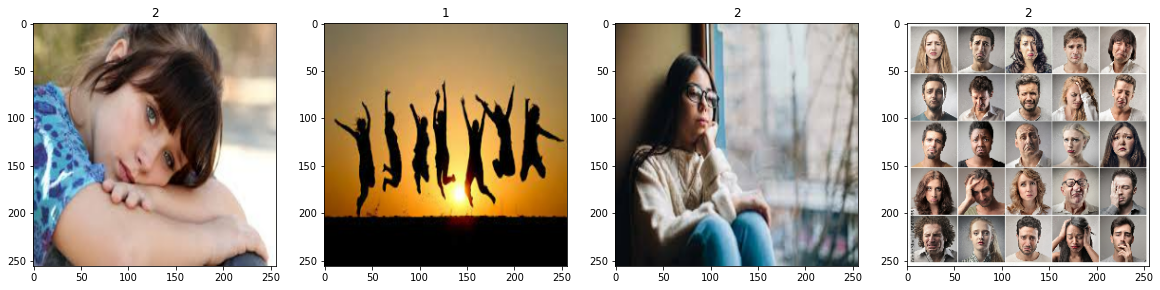

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [59]:
data = data.map(lambda x,y: (x/255, y))

In [60]:
data.as_numpy_iterator().next()

(array([[[[0.48235294, 0.42745098, 0.4862745 ],
          [0.48137254, 0.4343137 , 0.48921567],
          [0.48120403, 0.4341452 , 0.48904717],
          ...,
          [0.38883272, 0.35746017, 0.4162837 ],
          [0.38861826, 0.3572457 , 0.41606924],
          [0.3882353 , 0.35686275, 0.41568628]],
 
         [[0.48235294, 0.42745098, 0.4862745 ],
          [0.48137254, 0.4343137 , 0.48921567],
          [0.485769  , 0.43871018, 0.49361214],
          ...,
          [0.39557293, 0.36420035, 0.4230239 ],
          [0.3882353 , 0.35686275, 0.41568628],
          [0.38431373, 0.3529412 , 0.4117647 ]],
 
         [[0.4862745 , 0.43137255, 0.49019608],
          [0.48235294, 0.43529412, 0.49019608],
          [0.4862745 , 0.4392157 , 0.49411765],
          ...,
          [0.3923407 , 0.36096814, 0.41979167],
          [0.39229473, 0.3609222 , 0.4197457 ],
          [0.38449755, 0.353125  , 0.41194853]],
 
         ...,
 
         [[0.50200677, 0.2196538 , 0.03141851],
          [0.52997

# 5. Split Data

In [61]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [62]:
train_size

7

In [63]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [64]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [65]:
model = Sequential()

In [66]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [69]:
logdir='logs'

In [70]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: -22.4935 - accuracy: 0.5134 - val_loss: -100.8453 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: -322.3457 - accuracy: 0.4598 - val_loss: -963.9193 - val_accuracy: 0.4531
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: -2169.5295 - accuracy: 0.5000 - val_loss: -5092.5239 - val_accuracy: 0.4531
Epoch 4/20
7/7 [==============================] - 18s 2s/step - loss: -10444.2949 - accuracy: 0.4866 - val_loss: -18064.2773 - val_accuracy: 0.5312
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: -43629.9727 - accuracy: 0.4732 - val_loss: -81938.1562 - val_accuracy: 0.4219
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: -121520.6797 - accuracy: 0.5045 - val_loss: -268806.8750 - val_accuracy: 0.3750
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: -365331.6875 - accuracy: 0.4821 - val_loss: -496857

# 8. Plot Performance

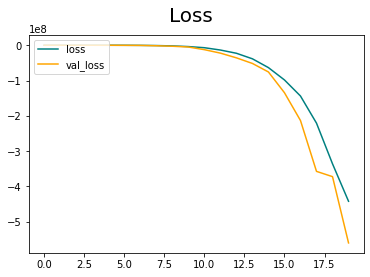

In [72]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

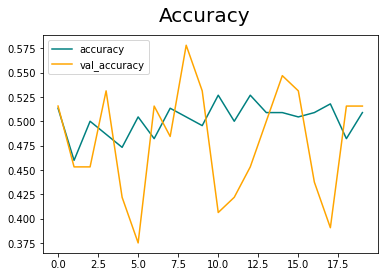

In [73]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [74]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [75]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [76]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.64705884, shape=(), dtype=float32)


# 10. Test

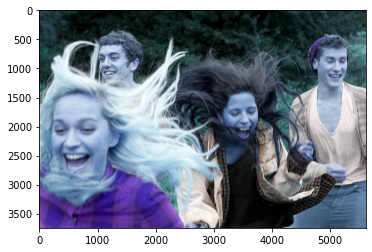

In [77]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

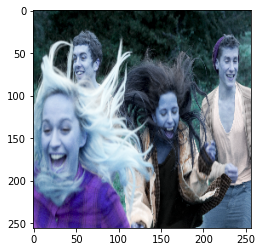

In [78]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [80]:
yhat

array([[1.]], dtype=float32)

In [81]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [88]:
model.save(os.path.join('models','imageclassifier.h5'))

There might be a path issue here. This could be resolved by moving the model outside of the folder. I think this is only a pathing issue. If you don't do this on Google Colab you will probably be fine.

In [89]:
new_model = load_model('imageclassifier.h5')

OSError: ignored

Same problem here. Just see above to make sure the model is in the right place.

In [87]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: ignored